In [ ]:
#Use the Simple Moving Average Crossvoer Strategy and Python to get buy and sell signals
#Buy = STMA > LTMA
#Sell = STMA < LTMA

In [ ]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#load the data
from google.colab import files
files.upload()

Saving AAPL.csv to AAPL.csv


{'AAPL.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2022-12-19,135.110001,135.199997,131.320007,132.369995,131.634216,79592600\n2022-12-20,131.389999,133.250000,129.889999,132.300003,131.564621,77432800\n2022-12-21,132.979996,136.809998,132.750000,135.449997,134.697113,85928000\n2022-12-22,134.350006,134.559998,130.300003,132.229996,131.494995,77852100\n2022-12-23,130.919998,132.419998,129.639999,131.860001,131.127060,63814900\n2022-12-27,131.380005,131.410004,128.720001,130.029999,129.307236,69007800\n2022-12-28,129.669998,131.029999,125.870003,126.040001,125.339409,85438400\n2022-12-29,127.989998,130.479996,127.730003,129.610001,128.889572,75703700\n2022-12-30,128.410004,129.949997,127.430000,129.929993,129.207794,77034200\n2023-01-03,130.279999,130.899994,124.169998,125.070000,124.374794,112117500\n2023-01-04,126.889999,128.660004,125.080002,126.360001,125.657639,89113600\n2023-01-05,127.129997,127.769997,124.760002,125.019997,124.325073,80962700\n2023-01-06,126.010002,130.289

In [ ]:
#Store the data
df = pd.read_csv('AAPL.csv')
#Set the date as index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
#Show data
df

,Date,Open,High,Low,Close,Adj Close,Volume
2022-12-19,2022-12-19,135.110001,135.199997,131.320007,132.369995,131.634216,79592600
2022-12-20,2022-12-20,131.389999,133.250000,129.889999,132.300003,131.564621,77432800
2022-12-21,2022-12-21,132.979996,136.809998,132.750000,135.449997,134.697113,85928000
2022-12-22,2022-12-22,134.350006,134.559998,130.300003,132.229996,131.494995,77852100
2022-12-23,2022-12-23,130.919998,132.419998,129.639999,131.860001,131.127060,63814900
...,...,...,...,...,...,...,...
2023-12-11,2023-12-11,193.110001,193.490005,191.419998,193.179993,193.179993,60943700
2023-12-12,2023-12-12,193.080002,194.720001,191.720001,194.710007,194.710007,52696900
2023-12-13,2023-12-13,195.089996,198.000000,194.850006,197.960007,197.960007,70404200
2023-12-14,2023-12-14,198.020004,199.619995,196.160004,198.110001,198.110001,66831600


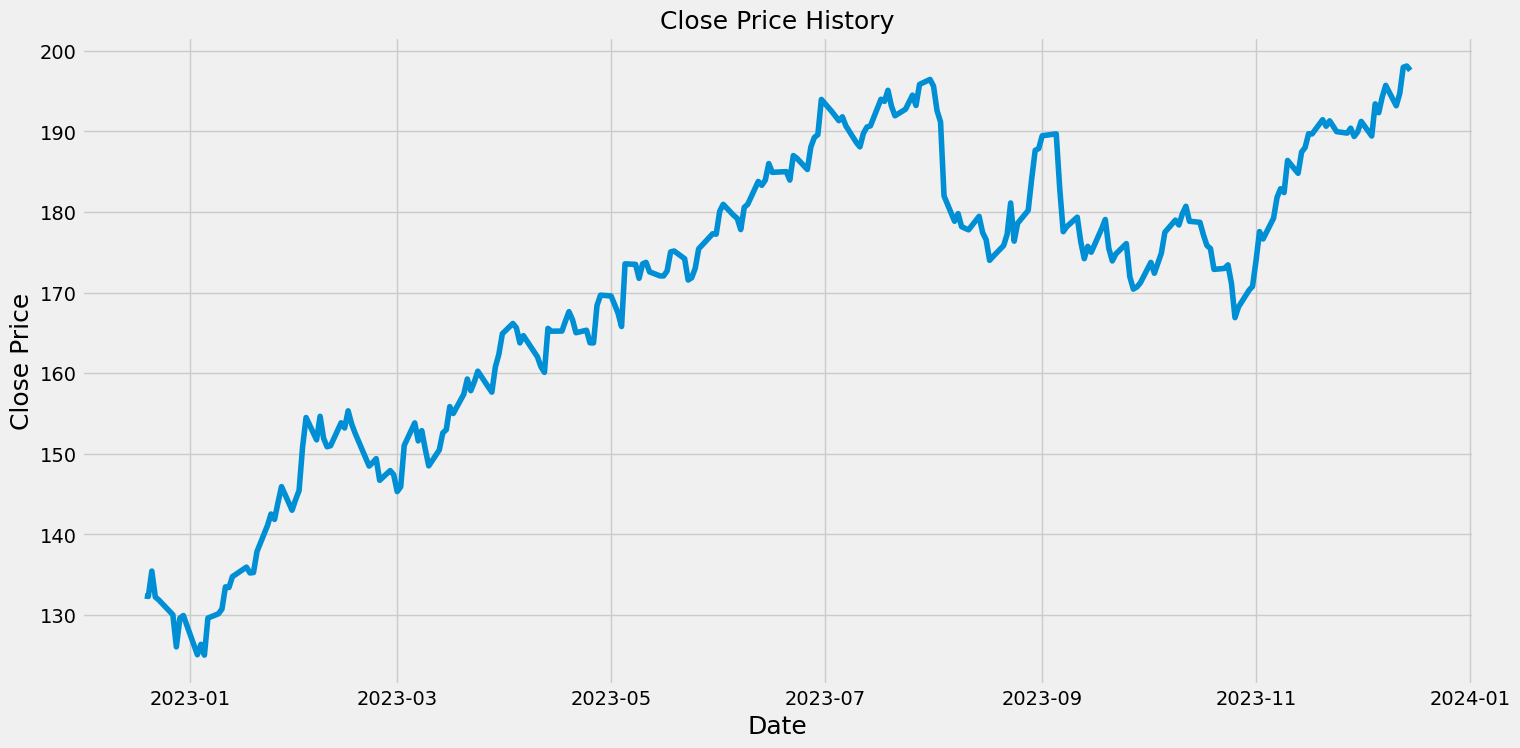

In [ ]:
#visually show the close price
plt.figure(figsize=(16,8))
plt.title('Close Price History', fontsize = 18)
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price', fontsize = 18)
plt.show()

In [ ]:
#create a function to calcualate the simple movoing average (SMA)
def SMA(data, period = 30, column='Close'):
  return data[column].rolling(window=period).mean()

In [ ]:
#create two new columns to store the 20day and 50day SMA
df['SMA20'] = SMA(df, 20)
df['SMA50'] = SMA(df, 50)

In [ ]:
#Get the buy and sell signals

#create column 'signal' when SMA20>SMA50. If yes = 1, no = 0
df['Signal'] = np.where(df['SMA20']>df['SMA50'], 1, 0)

#create column 'position' getting difference.
#give both buy(1-0) and sell(0-1) signals
df['Position'] = df['Signal'].diff()

#Seperate buy and sell signals
df['Buy'] = np.where(df['Position'] == 1, df['Close'], np.NAN)
df['Sell'] = np.where(df['Position'] == -1, df['Close'], np.NAN)

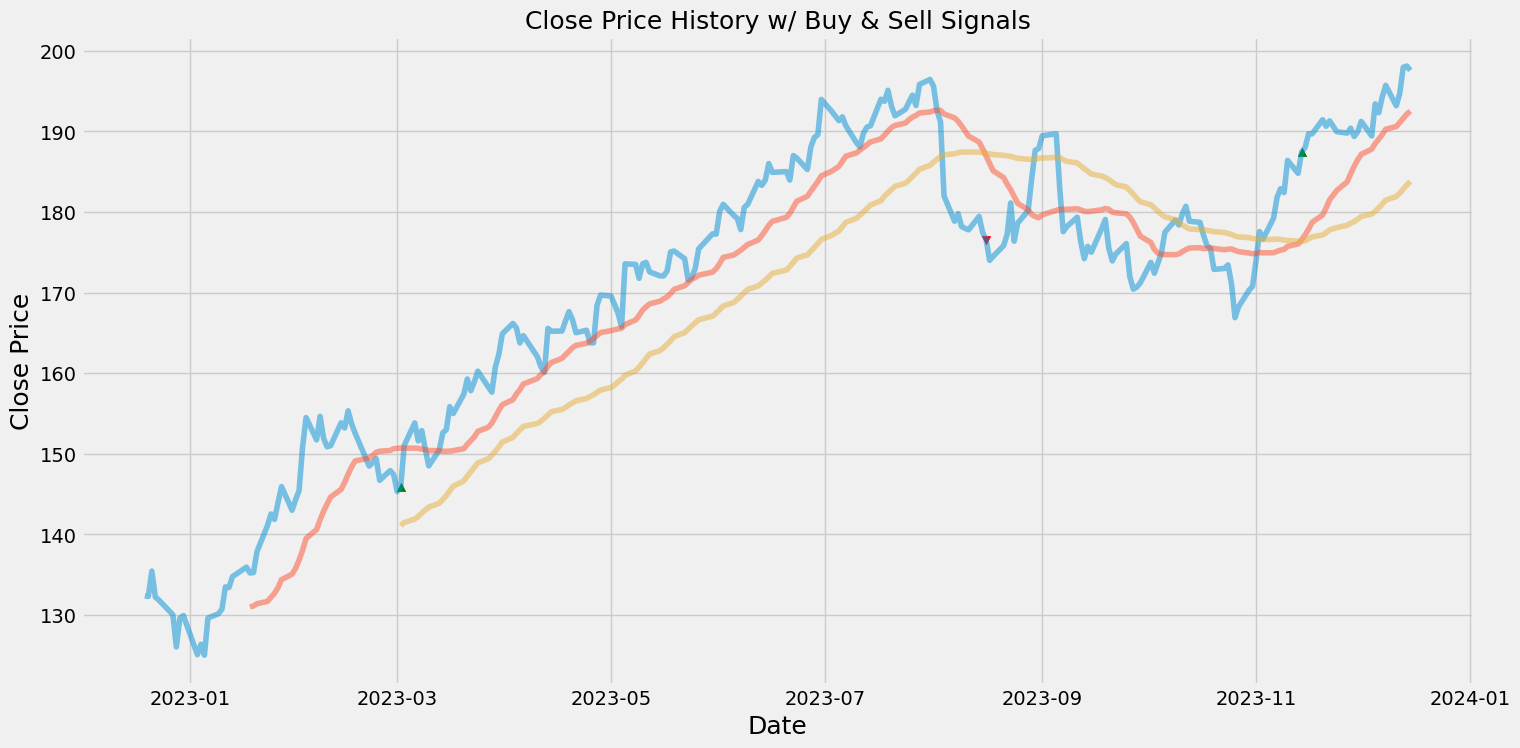

In [ ]:
#Visually show the close price with the SMAs and Buy/Sell signals
plt.figure(figsize=(16,8))
plt.title('Close Price History w/ Buy & Sell Signals', fontsize = 18)
plt.plot(df['Close'], alpha = 0.5, label='Close')
plt.plot(df['SMA20'], alpha = 0.5, label='SMA20')
plt.plot(df['SMA50'], alpha = 0.5, label='SMA50')

#plot signals
plt.scatter(df.index, df['Buy'], alpha = 1, label='Buy Signal', marker = '^', color = 'green')
plt.scatter(df.index, df['Sell'], alpha = 1, label='Sell Signal', marker = 'v', color = 'red')

plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price', fontsize = 18)
plt.show()